In [1]:
#Dependencias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Importo los archivos a utilizar
mouse_df = pd.read_csv("./Resources/mouse_drug_data.csv")
clinical_df = pd.read_csv("./Resources/clinicaltrial_data.csv")

In [3]:
#Obtengo un DataFrame para poder graficar 
data = pd.merge(left=mouse_df, right=clinical_df, left_on=["Mouse ID"], right_on=["Mouse ID"], how="right").sort_values(by="Mouse ID")
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
926,a203,Infubinol,0,45.000000,0
934,a203,Infubinol,40,63.593490,2
933,a203,Infubinol,35,61.931650,2
932,a203,Infubinol,30,59.523197,1
931,a203,Infubinol,25,56.793208,1


In [4]:
#Agrupo mis datos por Drug y por Timepoint para graficar y saco la media 
groupedtumordata = data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
groupedtumordata = pd.DataFrame(groupedtumordata)
groupedtumordata.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
timepoint = [0,5,10,15,20,25,30,35,40,45]
drugs = groupedtumordata['Drug'].unique()
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [9]:
capomulin = groupedtumordata['Tumor Volume (mm3)'][0:10]
ceftamin = groupedtumordata['Tumor Volume (mm3)'][10:20]
infubinol = groupedtumordata['Tumor Volume (mm3)'][20:30]
ketapril = groupedtumordata['Tumor Volume (mm3)'][30:40]
naftisol = groupedtumordata['Tumor Volume (mm3)'][40:50]
placebo = groupedtumordata['Tumor Volume (mm3)'][50:60]
propriva = groupedtumordata['Tumor Volume (mm3)'][60:70]
ramicane = groupedtumordata['Tumor Volume (mm3)'][70:80]
stelasyn = groupedtumordata['Tumor Volume (mm3)'][80:90]
zoniferol = groupedtumordata['Tumor Volume (mm3)'][90:100]

Text(0.5, 1.0, 'Tumor volume changes over time')

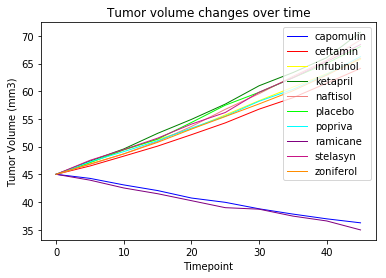

In [10]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatment
plt.plot(timepoint, capomulin, linewidth=1, color="blue", label = "capomulin")
plt.plot(timepoint, ceftamin, linewidth=1, color="red", label = "ceftamin")
plt.plot(timepoint, infubinol, linewidth=1, color="yellow", label = "infubinol")
plt.plot(timepoint, ketapril, linewidth=1, color="green", label = "ketapril")
plt.plot(timepoint, naftisol, linewidth=1, color="lightcoral", label = "naftisol")
plt.plot(timepoint, placebo, linewidth=1, color="lime", label = "placebo")
plt.plot(timepoint, propriva, linewidth=1, color="cyan", label = "popriva")
plt.plot(timepoint, ramicane, linewidth=1, color="purple", label = "ramicane")
plt.plot(timepoint, stelasyn, linewidth=1, color="mediumvioletred", label = "stelasyn")
plt.plot(timepoint, zoniferol, linewidth=1, color="darkorange", label = "zoniferol")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper right")
plt.title("Tumor volume changes over time")

In [11]:
#Obtengo los errores estandar
groupedtumordatasem = data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
groupedtumordatasem = pd.DataFrame(groupedtumordatasem)
groupedtumordatasem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
#Agrupo mis datos por Drug y por Timepoint para graficar y saco la media 
groupedmetdata = data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean().reset_index()
groupedmetdata = pd.DataFrame(groupedmetdata)
groupedmetdata.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
capomulin = groupedmetdata['Metastatic Sites'][0:10]
ceftamin = groupedmetdata['Metastatic Sites'][10:20]
infubinol = groupedmetdata['Metastatic Sites'][20:30]
ketapril = groupedmetdata['Metastatic Sites'][30:40]
naftisol = groupedmetdata['Metastatic Sites'][40:50]
placebo = groupedmetdata['Metastatic Sites'][50:60]
propriva = groupedmetdata['Metastatic Sites'][60:70]
ramicane = groupedmetdata['Metastatic Sites'][70:80]
stelasyn = groupedmetdata['Metastatic Sites'][80:90]
zoniferol = groupedmetdata['Metastatic Sites'][90:100]

Text(0.5, 1.0, 'Metastatic sites changes over time')

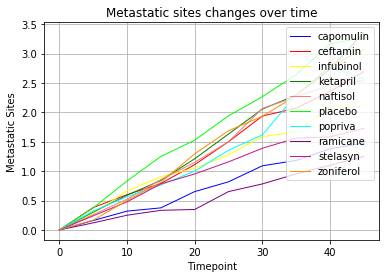

In [14]:
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
plt.plot(timepoint, capomulin, linewidth=1, color="blue", label = "capomulin")
plt.plot(timepoint, ceftamin, linewidth=1, color="red", label = "ceftamin")
plt.plot(timepoint, infubinol, linewidth=1, color="yellow", label = "infubinol")
plt.plot(timepoint, ketapril, linewidth=1, color="green", label = "ketapril")
plt.plot(timepoint, naftisol, linewidth=1, color="lightcoral", label = "naftisol")
plt.plot(timepoint, placebo, linewidth=1, color="lime", label = "placebo")
plt.plot(timepoint, propriva, linewidth=1, color="cyan", label = "popriva")
plt.plot(timepoint, ramicane, linewidth=1, color="purple", label = "ramicane")
plt.plot(timepoint, stelasyn, linewidth=1, color="mediumvioletred", label = "stelasyn")
plt.plot(timepoint, zoniferol, linewidth=1, color="darkorange", label = "zoniferol")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")
plt.legend(loc="upper right")
plt.grid()
plt.title("Metastatic sites changes over time")

In [15]:
#Survival rate
mouse_data = data.groupby(["Drug", "Timepoint"])["Mouse ID"].count().reset_index()
mouse_data_rename = mouse_data.rename(columns={"Mouse ID":"Mouse Count"})
mouse_data_rename.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
Meta_mean_pivot = groupedmetdata.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
Meta_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [17]:
mouse_data = data.groupby(["Drug", "Timepoint"])["Mouse ID"].count().reset_index()
mouse_data_rename = mouse_data.rename(columns={"Mouse ID":"Mouse Count"})
mouse_df = pd.DataFrame(mouse_data_rename)
mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
Mouse_data_pivot = mouse_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"] / 25 * 100
Mouse_data_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


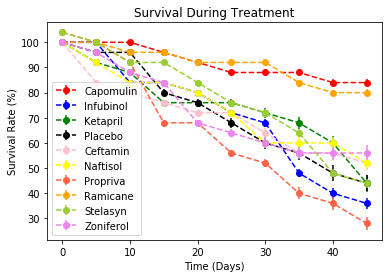

In [19]:
plt.figure()
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Capomulin"], yerr=Meta_mean_pivot["Capomulin"], color="r", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Infubinol"], yerr=Meta_mean_pivot["Infubinol"], color="b", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Ketapril"], yerr=Meta_mean_pivot["Ketapril"], color="g", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Placebo"], yerr=Meta_mean_pivot["Placebo"], color="black", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Ceftamin"], yerr=Meta_mean_pivot["Ceftamin"], color="pink", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Naftisol"], yerr=Meta_mean_pivot["Naftisol"], color="yellow", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Propriva"], yerr=Meta_mean_pivot["Propriva"], color="tomato", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Ramicane"], yerr=Meta_mean_pivot["Ramicane"], color="orange", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Stelasyn"], yerr=Meta_mean_pivot["Stelasyn"], color="yellowgreen", fmt="o--")
plt.errorbar(Mouse_data_pivot.index, Mouse_data_pivot["Zoniferol"], yerr=Meta_mean_pivot["Zoniferol"], color="violet", fmt="o--")
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo","Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"], loc="best")
plt.show()

In [20]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [21]:
capomulin1 = groupedtumordata['Tumor Volume (mm3)'][0:9].mean()
capomulin2 = groupedtumordata['Tumor Volume (mm3)'][1:10].mean()
ceftamin1 = groupedtumordata['Tumor Volume (mm3)'][10:19].mean()
ceftamin2 = groupedtumordata['Tumor Volume (mm3)'][11:20].mean()
infubinol1 = groupedtumordata['Tumor Volume (mm3)'][20:29].mean()
infubinol2 = groupedtumordata['Tumor Volume (mm3)'][21:30].mean()
ketapril1 = groupedtumordata['Tumor Volume (mm3)'][30:39].mean()
ketapril2 = groupedtumordata['Tumor Volume (mm3)'][31:40].mean()
naftisol1 = groupedtumordata['Tumor Volume (mm3)'][40:49].mean()
naftisol2 = groupedtumordata['Tumor Volume (mm3)'][41:50].mean()
placebo1 = groupedtumordata['Tumor Volume (mm3)'][50:59].mean()
placebo2 = groupedtumordata['Tumor Volume (mm3)'][51:60].mean()
propriva1 = groupedtumordata['Tumor Volume (mm3)'][60:69].mean()
propriva2 = groupedtumordata['Tumor Volume (mm3)'][61:70].mean()
ramicane1 = groupedtumordata['Tumor Volume (mm3)'][70:79].mean()
ramicane2 = groupedtumordata['Tumor Volume (mm3)'][71:80].mean()
stelasyn1 = groupedtumordata['Tumor Volume (mm3)'][80:89].mean()
stelasyn2 = groupedtumordata['Tumor Volume (mm3)'][81:90].mean()
zoniferol1 = groupedtumordata['Tumor Volume (mm3)'][90:99].mean()
zoniferol2 = groupedtumordata['Tumor Volume (mm3)'][91:100].mean()

In [22]:
p1=((capomulin2/capomulin1)-1)*100
p2=((ceftamin2/ceftamin1)-1)*100
p3=((infubinol2/infubinol1)-1)*100
p4=((ketapril2/ketapril1)-1)*100
p5=((naftisol2/naftisol1)-1)*100
p6=((placebo2/placebo1)-1)*100
p7=((propriva2/propriva1)-1)*100
p8=((ramicane2/ramicane1)-1)*100
p9=((stelasyn2/stelasyn1)-1)*100
p10=((zoniferol2/zoniferol1)-1)*100

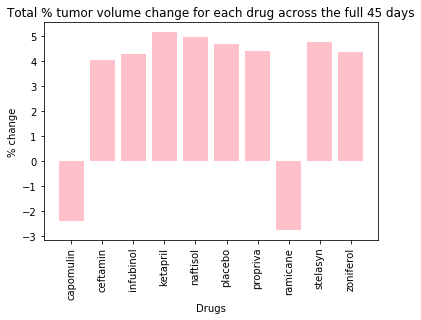

In [25]:
height = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
bars = ('capomulin','ceftamin','infubinol','ketapril','naftisol','placebo','propriva','ramicane','stelasyn','zoniferol')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = 'pink')
plt.xticks(y_pos, bars,rotation=90)
plt.title('Total % tumor volume change for each drug across the full 45 days')
plt.xlabel('Drugs')
plt.ylabel('% change')
plt.show()